In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('top-1m.csv')

In [18]:
df

In [5]:
df['TLD'] = map((lambda x: '.'.join(x.split('.')[-2:]) if '.co.' in x else x.split('.')[-1]), df['site'])

In [6]:
df

,serial,site,TLD
0,1,google.com,com
1,2,facebook.com,com
2,3,youtube.com,com
3,4,baidu.com,com
4,5,yahoo.com,com
5,6,amazon.com,com
6,7,wikipedia.org,org
7,8,qq.com,com
8,9,taobao.com,com
9,10,twitter.com,com


In [7]:
freq = df.groupby('TLD').count()
del freq['site']
freq.columns = ['Frequency']
sorted_freq = freq.sort(axis=0, columns='Frequency', ascending=False)

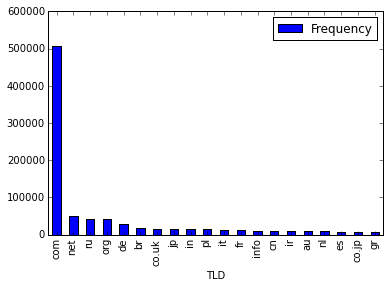

In [8]:
sorted_freq[:20].plot(kind='bar') #top 20 TLDs

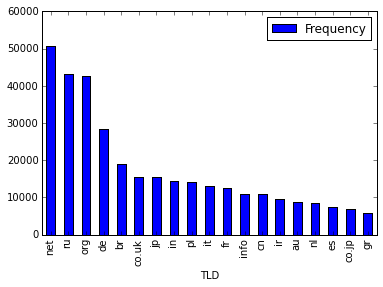

In [9]:
sorted_freq[1:20].plot(kind='bar')  #TLDs from 2-20

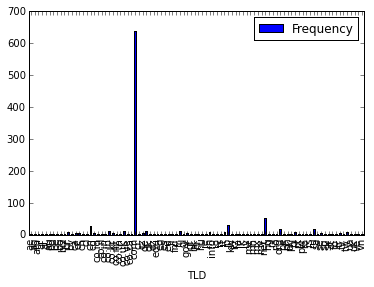

In [12]:
# TLD frequency for top 1000 sites
top_1k = df[:1000]

freqd = top_1k.groupby('TLD').count()
del freqd['site']
freqd.columns = ['Frequency']
freqd.plot(kind='bar')


In [56]:
slots=range(0,1000000,1000)
dfslots = map((lambda x: df[x:x+1000].groupby('TLD').count()), slots)

In [89]:
def tld_frequency(tld):
    perc_index = []
    perc_columns = []
    counter = 0
    for each in dfslots:
        tld_count = each.loc[tld].site
        total_count = each.sum().site
        percentage = (float(tld_count)/float(total_count))*100
        perc_columns.append(percentage)
        perc_index.append("{0}-{1}".format(counter, counter+1000))
        counter+=1000
    return pd.DataFrame(perc_columns, index=perc_index, columns=[tld])

In [92]:
perc_tld = tld_frequency('net')

In [85]:
perc_tld.plot(kind='bar')